# Medidas de dispersión

In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")


In [3]:
# lo primero que hacemos es cargar el dataframe que vamos a usar para esta lección
df = pd.read_csv("../3.8 Visualization II//bank-additional-clean-nonulls.csv")
df.head()

,income,kidhome,teenhome,dt_customer,numwebvisitsmonth,id,job,marital,education,default,housing,loan,contact,duration,campaign,previous,poutcome,empvarrate,conspriceidx,consconfidx,nremployed,y,date,latitude,longitude,contact_month,contact_year,age_cat,hijos_totales,age,euribor3m,pdays
0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079,housemaid,married,basic 4y,No,No,No,telephone,261,1,0,nonexistent,1.1,93.994,-36.4,5191,no,2-agosto-2019,41.495,-71.233,agosto,2019.0,Adultos mayores,1 hijos,40.005436,4.857000,4.4
1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097,services,married,high school,No,No,No,telephone,149,1,0,nonexistent,1.1,93.994,-36.4,5191,no,14-septiembre-2016,34.601,-83.923,septiembre,2016.0,Mediana edad,2 hijos,57.000000,3.603174,4.8
2,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b,services,married,high school,No,Si,No,telephone,226,1,0,nonexistent,1.1,93.994,-36.4,5191,no,15-febrero-2019,34.939,-94.847,febrero,2019.0,Adultos jóvenes,2 hijos,37.000000,4.857000,7.0
3,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e,admin.,married,basic 6y,No,No,No,telephone,151,1,0,nonexistent,1.1,93.994,-36.4,5191,no,29-noviembre-2015,49.041,-70.308,noviembre,2015.0,Mediana edad,3 hijos,40.000000,3.595488,3.0
4,63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,services,married,high school,No,No,Si,telephone,307,1,0,nonexistent,1.1,93.994,-36.4,5191,no,29-enero-2017,38.033,-104.463,enero,2017.0,Mediana edad,3 hijos,56.000000,3.602722,7.4


# Varianza
Para calcular la varianza usaremos el método `.var()`. La sintaxis básica:

```python
df['Nombre_de_Columna'].var()
```

In [4]:
# Vamos a calcular la varianza de los ingresos de los clientes.
# La varianza de los ingresos nos indica cuán dispersos están los ingresos de los clientes alrededor de su valor promedio. Si la varianza es alta, significa que los ingresos varían mucho de un cliente a otro. Si es baja, los ingresos son más consistentes.

media_ingresos = 93241.2
mediana_ingresos = 93050.5

varianza_ingresos = df['income'].var()
print(f"La media de los ingresos de los clientes es: {np.round(media_ingresos, 2)}")
print(f"La mediana de los ingresos de los clientes es: {np.round(mediana_ingresos, 2)}")
print(f"La varianza  de los ingresos de los clientes es: {np.round(varianza_ingresos, 2)}")



La media de los ingresos de los clientes es: 93241.2
La mediana de los ingresos de los clientes es: 93050.5
La varianza  de los ingresos de los clientes es: 2550079937.2


In [5]:
#  Calcularemos la varianza de las edades de los clientes.
# Interpretación: La varianza de las edades nos dice cuán dispersas están las edades de los clientes alrededor de su edad promedio. Si la varianza es alta, significa que las edades varían considerablemente. Si es baja, las edades son más similares entre los clientes.

media_edad = 39.98
mediana_edad = 38.0

varianza_edades = df['age'].var()
print(f"La media de la edad de los clientes es: {np.round(media_edad, 2)}")
print(f"La mediana de edad de los clientes es: {np.round(mediana_edad, 2)}")
print(f"La varianza de la edad de los clientes es: {np.round(varianza_edades, 2)}")



La media de la edad de los clientes es: 39.98
La mediana de edad de los clientes es: 38.0
La varianza de la edad de los clientes es: 98.68


**¿Cómo interpretamos conjuntamente la media, mediana y varianza?**

1. **Media (Promedio): 39.98**

   - La media es el promedio de todas las edades en el conjunto de datos. Se calcula sumando todas las edades y dividiendo por el número total de clientes.

   - En este caso, la media de edad nos da una idea general de cuál es la "edad promedio" en el conjunto de clientes. Es el valor promedio que se obtendría si se distribuyeran equitativamente las edades entre todos los clientes.

2. **Mediana (Valor del medio): 38**

   - La mediana es el valor que se encuentra justo en el medio de la lista de edades cuando estas se ordenan de menor a mayor.

   - En este caso, la mediana de edad es 38, lo que significa que la mitad de los clientes tienen edades iguales o inferiores a este valor y la otra mitad tiene edades iguales o superiores a este valor. La mediana es útil cuando hay valores extremadamente altos o bajos que pueden afectar la media.

3. **Varianza: 108.95**
   - La varianza es una medida de la dispersión de las edades alrededor de la media. Es una medida de cuán dispersas están las edades en el conjunto de datos.
   
   - En este caso, una varianza de 108.95 indica que las edades tienden a variar relativamente mucho alrededor de la media. Cuanto menor sea la varianza, menor será la dispersión de las edades, lo que sugiere que la mayoría de los clientes tienen edades cercanas a la media y que no hay valores extremadamente alejados de esta.

---------

Para visualizar la varianza, una buena opción es un histograma, que mostrará cómo se distribuyen los datos alrededor de la media. Sin embargo, la varianza en sí misma no se representa directamente en un gráfico, ya que es una medida numérica. Aquí tienes un ejemplo de cómo visualizar la varianza de las edades utilizando un histograma:


Este histograma te mostrará cómo se distribuyen las edades de los clientes y te ayudará a entender la varianza en el contexto de la distribución de edades.

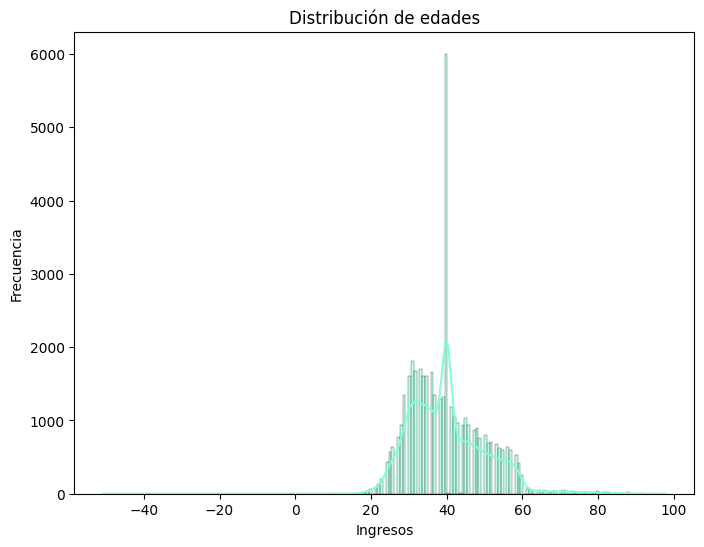

In [6]:
# establecemos el tamaño de la figura
plt.figure(figsize=(8, 6))

# utilizando un histplot podremos visualizar la mediana
sns.histplot(data=df, 
             x='age', 
             kde=True, 
             color='aquamarine')

# cambiamos el nombre del eje x
plt.xlabel('Ingresos')

# cambiamos el nombre del eje y
plt.ylabel('Frecuencia')

# ponemos título a la gráfica
plt.title('Distribución de edades'); 

## Desviación estándar

En este caso usaremos el método `std()` de Pandas. La sintaxis básica del método `.std()`:

```python
df['Columna'].std()
```


In [8]:
# Calcularemos la desviación estándar de los Ingresos
# Interpretación: La desviación estándar de los ingresos mide cuánto varían los ingresos de los clientes respecto a la media. En este caso, una desviación estándar más alta indicaría que los ingresos están más dispersos alrededor de la media, mientras que una desviación estándar más baja indicaría que los ingresos son más consistentes y tienden a estar más cerca de la media.

desviacion_estandar_ingresos = df['income'].std()
print(f"La media de los ingresos de los clientes es: {np.round(media_ingresos, 2)}")
print(f"La mediana de los ingresos de los clientes es: {np.round(mediana_ingresos, 2)}")
print(f"La varianza  de los ingresos de los clientes es: {np.round(varianza_ingresos, 2)}")
print(f"La desviación estándar de los ingresos de los clientes es: {np.round(desviacion_estandar_ingresos, 2)}")


La media de los ingresos de los clientes es: 93241.2
La mediana de los ingresos de los clientes es: 93050.5
La varianza  de los ingresos de los clientes es: 2550079937.2
La desviación estándar de los ingresos de los clientes es: 50498.32


In [9]:
# Calculamos la desviación estándar de la Edad:
# Interpretación: La desviación estándar de las edades mide cuánto varían las edades de los clientes respecto a la media de las edades. Una desviación estándar más alta indicaría una mayor dispersión de las edades alrededor de la media, mientras que una desviación estándar más baja indicaría que las edades son más consistentes y tienden a estar más cerca de la media
desviacion_estandar_edad = df['age'].std()

print(f"La media de la edad de los clientes es: {np.round(media_edad, 2)}")
print(f"La mediana de edad de los clientes es: {np.round(mediana_edad, 2)}")
print(f"La varianza de la edad de los clientes es: {np.round(varianza_edades, 2)}")
print(f"La desviación estándar de la edad de los clientes es: {np.round(desviacion_estandar_edad, 2)}")



La media de la edad de los clientes es: 39.98
La mediana de edad de los clientes es: 38.0
La varianza de la edad de los clientes es: 98.68
La desviación estándar de la edad de los clientes es: 9.93


**¿Cómo interpretamos todas las medidas que hemos visto a la vez?**


1. **Media (Promedio): 39.98**
   - La media es el promedio de todas las edades en el conjunto de datos. Se calcula sumando todas las edades y dividiendo por el número total de clientes.
   - En este caso, la media de edad nos da una idea general de cuál es la "edad promedio" en el conjunto de clientes.

2. **Mediana (Valor del Medio): 38**
   - La mediana es el valor que se encuentra justo en el medio de la lista de edades cuando estas se ordenan de menor a mayor.
   - La mediana es útil cuando hay valores extremadamente altos o bajos que pueden afectar la media. En este caso, significa que la mitad de los clientes tienen edades iguales o inferiores a 38 y la otra mitad tiene edades iguales o superiores a este valor.

3. **Varianza: 108.95**
   - La varianza es una medida de la dispersión de las edades alrededor de la media. Es una medida de cuán dispersas están las edades en el conjunto de datos.
   - En este caso, una varianza de 108.95 indica que las edades tienden a variar relativamente mucho alrededor de la media. Cuanto mayor sea la varianza, mayor será la dispersión de las edades alrededor de la media.

4. **Desviación Estándar: 10.44**
   - La desviación estándar es simplemente la raíz cuadrada de la varianza. Es una medida de dispersión que tiene las mismas unidades que la variable original (en este caso, años).
   - Una desviación estándar más baja indica que las edades tienden a estar más cerca de la media, mientras que una desviación estándar más alta indica que las edades están más dispersas alrededor de la media.

En resumen, la media nos da el valor promedio, la mediana nos muestra el valor del medio, la varianza nos dice cuánto se dispersan las edades, y la desviación estándar nos proporciona una medida de dispersión que tiene las mismas unidades que la variable original. Cada una de estas medidas aporta información diferente sobre la distribución de las edades en el conjunto de datos.